In [1]:
import scipy.optimize as so
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rn

In [2]:
def fitnessFunction(X):
    v = float(X)
    m = 1 + (np.cos(0.04*v))**2
    n = np.exp((- (v) **2 )/(20000))
    return m * n

In [3]:
X = []
for i in range(-500, 500, 1):
    X = X + [i]

In [4]:
Y = []
for i in X:
    Y = Y + [fitnessFunction(i)]

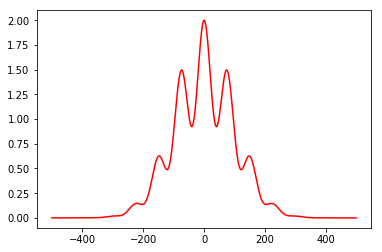

In [5]:
plt.plot(X, Y, color = 'red')
plt.show()

In [124]:
def cost_function(X): return -fitnessFunction(X)

In [125]:
interval = (-500, 500)

In [309]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = 250
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [310]:
def temperature(fraction):
    """ Example of temperature dicreasing as the process goes on."""
    return max(10, min(10, 10 - fraction))

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p
    
def random_neighbour(x, fraction=50):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [311]:
temperature(100)
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=10000, debug=True)

Step # 0/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 1/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 2/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 3/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 4/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 5/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 6/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.075 ...
Step # 7/10000 : T =   10, state =  250, cost = -0.075, new_state =  250, new_cost = -0.0749 ...
Step # 8/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.075 ...
Step # 9/10000 : T =   10, state =  250, cost = -0.075, new_state =  250, new_cost = -0.075 ...
Step #10/10000 : T =   10

Step #92/10000 : T =   10, state =  249, cost = -0.0773, new_state =  249, new_cost = -0.0782 ...
Step #93/10000 : T =   10, state =  249, cost = -0.0782, new_state =  249, new_cost = -0.0769 ...
Step #94/10000 : T =   10, state =  249, cost = -0.0769, new_state =  250, new_cost = -0.0757 ...
Step #95/10000 : T =   10, state =  250, cost = -0.0757, new_state =  250, new_cost = -0.0763 ...
Step #96/10000 : T =   10, state =  250, cost = -0.0763, new_state =  249, new_cost = -0.0767 ...
Step #97/10000 : T =   10, state =  249, cost = -0.0767, new_state =  249, new_cost = -0.0767 ...
Step #98/10000 : T =   10, state =  249, cost = -0.0767, new_state =  249, new_cost = -0.0781 ...
Step #99/10000 : T =   10, state =  249, cost = -0.0781, new_state =  250, new_cost = -0.0766 ...
Step #100/10000 : T =   10, state =  250, cost = -0.0766, new_state =  250, new_cost = -0.0762 ...
Step #101/10000 : T =   10, state =  250, cost = -0.0762, new_state =  250, new_cost = -0.0761 ...
Step #102/10000 : 

Step #1078/10000 : T =   10, state =  243, cost = -0.1, new_state =  248, new_cost = -0.0812 ...
Step #1079/10000 : T =   10, state =  248, cost = -0.0812, new_state =  244, new_cost = -0.0973 ...
Step #1080/10000 : T =   10, state =  244, cost = -0.0973, new_state =  247, new_cost = -0.0852 ...
Step #1081/10000 : T =   10, state =  247, cost = -0.0852, new_state =  242, new_cost = -0.102 ...
Step #1082/10000 : T =   10, state =  242, cost = -0.102, new_state =  244, new_cost = -0.0964 ...
Step #1083/10000 : T =   10, state =  244, cost = -0.0964, new_state =  243, new_cost = -0.102 ...
Step #1084/10000 : T =   10, state =  243, cost = -0.102, new_state =  246, new_cost = -0.09 ...
Step #1085/10000 : T =   10, state =  246, cost = -0.09, new_state =  243, new_cost = -0.099 ...
Step #1086/10000 : T =   10, state =  243, cost = -0.099, new_state =  246, new_cost = -0.0897 ...
Step #1087/10000 : T =   10, state =  246, cost = -0.0897, new_state =  248, new_cost = -0.0823 ...
Step #1088/10

Step #2078/10000 : T =   10, state =  445, cost = -6.21e-05, new_state =  443, new_cost = -6.45e-05 ...
Step #2079/10000 : T =   10, state =  443, cost = -6.45e-05, new_state =  433, new_cost = -8.46e-05 ...
Step #2080/10000 : T =   10, state =  433, cost = -8.46e-05, new_state =  437, new_cost = -7.52e-05 ...
Step #2081/10000 : T =   10, state =  437, cost = -7.52e-05, new_state =  443, new_cost = -6.45e-05 ...
Step #2082/10000 : T =   10, state =  443, cost = -6.45e-05, new_state =  440, new_cost = -6.82e-05 ...
Step #2083/10000 : T =   10, state =  440, cost = -6.82e-05, new_state =  436, new_cost = -7.76e-05 ...
Step #2084/10000 : T =   10, state =  436, cost = -7.76e-05, new_state =  438, new_cost = -7.29e-05 ...
Step #2085/10000 : T =   10, state =  438, cost = -7.29e-05, new_state =  443, new_cost = -6.45e-05 ...
Step #2086/10000 : T =   10, state =  443, cost = -6.45e-05, new_state =  452, new_cost = -5.51e-05 ...
Step #2087/10000 : T =   10, state =  452, cost = -5.51e-05, new

Step #3150/10000 : T =   10, state =  278, cost = -0.0213, new_state =  281, new_cost = -0.0204 ...
Step #3151/10000 : T =   10, state =  281, cost = -0.0204, new_state =  296, new_cost = -0.0195 ...
Step #3152/10000 : T =   10, state =  296, cost = -0.0195, new_state =  306, new_cost = -0.0174 ...
Step #3153/10000 : T =   10, state =  306, cost = -0.0174, new_state =  322, new_cost = -0.0107 ...
Step #3154/10000 : T =   10, state =  322, cost = -0.0107, new_state =  312, new_cost = -0.0153 ...
Step #3155/10000 : T =   10, state =  312, cost = -0.0153, new_state =  314, new_cost = -0.0143 ...
Step #3156/10000 : T =   10, state =  314, cost = -0.0143, new_state =  301, new_cost = -0.0188 ...
Step #3157/10000 : T =   10, state =  301, cost = -0.0188, new_state =  297, new_cost = -0.0194 ...
Step #3158/10000 : T =   10, state =  297, cost = -0.0194, new_state =  308, new_cost = -0.0171 ...
Step #3159/10000 : T =   10, state =  308, cost = -0.0171, new_state =  302, new_cost = -0.0185 ...


Step #4356/10000 : T =   10, state =  485, cost = -1.31e-05, new_state =  488, new_cost = -1.1e-05 ...
Step #4357/10000 : T =   10, state =  488, cost = -1.1e-05, new_state =  469, new_cost = -3.36e-05 ...
Step #4358/10000 : T =   10, state =  469, cost = -3.36e-05, new_state =  459, new_cost = -4.71e-05 ...
Step #4359/10000 : T =   10, state =  459, cost = -4.71e-05, new_state =  444, new_cost = -6.32e-05 ...
Step #4360/10000 : T =   10, state =  444, cost = -6.32e-05, new_state =  435, new_cost = -7.86e-05 ...
Step #4361/10000 : T =   10, state =  435, cost = -7.86e-05, new_state =  417, new_cost = -0.000225 ...
Step #4362/10000 : T =   10, state =  417, cost = -0.000225, new_state =  408, new_cost = -0.000414 ...
Step #4363/10000 : T =   10, state =  408, cost = -0.000414, new_state =  397, new_cost = -0.000753 ...
Step #4364/10000 : T =   10, state =  397, cost = -0.000753, new_state =  394, new_cost = -0.000857 ...
Step #4365/10000 : T =   10, state =  394, cost = -0.000857, new_s

Step #5576/10000 : T =   10, state = -405, cost = -0.000502, new_state = -426, new_cost = -0.000122 ...
Step #5577/10000 : T =   10, state = -426, cost = -0.000122, new_state = -426, new_cost = -0.000124 ...
Step #5578/10000 : T =   10, state = -426, cost = -0.000124, new_state = -434, new_cost = -8.15e-05 ...
Step #5579/10000 : T =   10, state = -434, cost = -8.15e-05, new_state = -460, new_cost = -4.6e-05 ...
Step #5580/10000 : T =   10, state = -460, cost = -4.6e-05, new_state = -469, new_cost = -3.37e-05 ...
Step #5581/10000 : T =   10, state = -469, cost = -3.37e-05, new_state = -475, new_cost = -2.47e-05 ...
Step #5582/10000 : T =   10, state = -475, cost = -2.47e-05, new_state = -448, new_cost = -5.92e-05 ...
Step #5583/10000 : T =   10, state = -448, cost = -5.92e-05, new_state = -446, new_cost = -6.11e-05 ...
Step #5584/10000 : T =   10, state = -446, cost = -6.11e-05, new_state = -441, new_cost = -6.71e-05 ...
Step #5585/10000 : T =   10, state = -441, cost = -6.71e-05, new_s

Step #6620/10000 : T =   10, state = -316, cost = -0.0136, new_state = -302, new_cost = -0.0186 ...
Step #6621/10000 : T =   10, state = -302, cost = -0.0186, new_state = -278, new_cost = -0.0214 ...
Step #6622/10000 : T =   10, state = -278, cost = -0.0214, new_state = -265, new_cost = -0.035 ...
Step #6623/10000 : T =   10, state = -265, cost = -0.035, new_state = -287, new_cost = -0.0198 ...
Step #6624/10000 : T =   10, state = -287, cost = -0.0198, new_state = -279, new_cost = -0.021 ...
Step #6625/10000 : T =   10, state = -279, cost = -0.021, new_state = -261, new_cost = -0.0426 ...
Step #6626/10000 : T =   10, state = -261, cost = -0.0426, new_state = -286, new_cost = -0.0199 ...
Step #6627/10000 : T =   10, state = -286, cost = -0.0199, new_state = -264, new_cost = -0.0355 ...
Step #6628/10000 : T =   10, state = -264, cost = -0.0355, new_state = -262, new_cost = -0.0397 ...
Step #6629/10000 : T =   10, state = -262, cost = -0.0397, new_state = -265, new_cost = -0.0348 ...
Step

Step #7575/10000 : T =   10, state =  296, cost = -0.0195, new_state =  263, new_cost = -0.0384 ...
Step #7576/10000 : T =   10, state =  263, cost = -0.0384, new_state =  269, new_cost = -0.0287 ...
Step #7577/10000 : T =   10, state =  269, cost = -0.0287, new_state =  232, new_cost = -0.135 ...
Step #7578/10000 : T =   10, state =  232, cost = -0.135, new_state =  266, new_cost = -0.0331 ...
Step #7579/10000 : T =   10, state =  266, cost = -0.0331, new_state =  284, new_cost = -0.02 ...
Step #7580/10000 : T =   10, state =  284, cost = -0.02, new_state =  249, new_cost = -0.0797 ...
Step #7581/10000 : T =   10, state =  249, cost = -0.0797, new_state =  269, new_cost = -0.0279 ...
Step #7582/10000 : T =   10, state =  269, cost = -0.0279, new_state =  262, new_cost = -0.0403 ...
Step #7583/10000 : T =   10, state =  262, cost = -0.0403, new_state =  253, new_cost = -0.0634 ...
Step #7584/10000 : T =   10, state =  253, cost = -0.0634, new_state =  230, new_cost = -0.138 ...
Step #7

Step #8575/10000 : T =   10, state = 8.97, cost = -1.87, new_state = 30.5, new_cost = -1.07 ...
Step #8576/10000 : T =   10, state = 30.5, cost = -1.07, new_state = 12.3, new_cost = -1.76 ...
Step #8577/10000 : T =   10, state = 12.3, cost = -1.76, new_state = 40.9, new_cost = -0.924 ...
Step #8578/10000 : T =   10, state = 40.9, cost = -0.924, new_state = 27.9, new_cost = -1.15 ...
Step #8579/10000 : T =   10, state = 27.9, cost = -1.15, new_state = 19.9, new_cost = -1.46 ...
Step #8580/10000 : T =   10, state = 19.9, cost = -1.46, new_state = 29.7, new_cost = -1.09 ...
Step #8581/10000 : T =   10, state = 29.7, cost = -1.09, new_state = 4.87, new_cost = -1.96 ...
Step #8582/10000 : T =   10, state = 4.87, cost = -1.96, new_state = 5.08, new_cost = -1.96 ...
Step #8583/10000 : T =   10, state = 5.08, cost = -1.96, new_state = 1.05, new_cost =   -2 ...
Step #8584/10000 : T =   10, state = 1.05, cost =   -2, new_state =   28, new_cost = -1.14 ...
Step #8585/10000 : T =   10, state =   2

Step #9574/10000 : T =   10, state =  361, cost = -0.00162, new_state =  356, new_cost = -0.0018 ...
Step #9575/10000 : T =   10, state =  356, cost = -0.0018, new_state =  370, new_cost = -0.00146 ...
Step #9576/10000 : T =   10, state =  370, cost = -0.00146, new_state =  401, new_cost = -0.000622 ...
Step #9577/10000 : T =   10, state =  401, cost = -0.000622, new_state =  382, new_cost = -0.00124 ...
Step #9578/10000 : T =   10, state =  382, cost = -0.00124, new_state =  414, new_cost = -0.00028 ...
Step #9579/10000 : T =   10, state =  414, cost = -0.00028, new_state =  369, new_cost = -0.00148 ...
Step #9580/10000 : T =   10, state =  369, cost = -0.00148, new_state =  394, new_cost = -0.000852 ...
Step #9581/10000 : T =   10, state =  394, cost = -0.000852, new_state =  405, new_cost = -0.000496 ...
Step #9582/10000 : T =   10, state =  405, cost = -0.000496, new_state =  442, new_cost = -6.64e-05 ...
Step #9583/10000 : T =   10, state =  442, cost = -6.64e-05, new_state =  422

(-92.62061229523181,
 -1.1167716182450949,
 [250,
  250.0,
  249.9952058543267,
  249.98630260199445,
  249.98501381655925,
  249.98822713203506,
  249.99924261301794,
  249.9717689543845,
  249.9895273411696,
  249.964848199502,
  249.97653868067627,
  250.02288626728145,
  250.06630641655264,
  250.01499047112077,
  250.03298492279856,
  250.0573725195775,
  249.99104795213321,
  250.03012360387498,
  250.11117259744194,
  250.14786898219594,
  250.21941087707293,
  250.222153343939,
  250.14360725766025,
  250.12512038244182,
  250.05749834214305,
  250.1031262825873,
  250.04003458917742,
  249.93100133571323,
  249.8410330258535,
  249.96538676731532,
  249.99828989594945,
  249.8534809252779,
  249.73526414522527,
  249.86667048742112,
  249.77047137302083,
  249.79520665010236,
  249.9053464274028,
  249.8874656556224,
  249.79881771480174,
  249.8983815214531,
  250.08087053384648,
  250.04968787683205,
  250.0370763186364,
  250.08929351565723,
  250.2062895813058,
  250.40447

In [317]:
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=10000, debug=False)

print(c)
print(min(costs))

-0.1385705752653264
-1.9999998577284137


In [318]:
for i in range(0,len(states)):
    if costs[i] == min(costs):
        print("Minimum is xmin = {} and ymin = {} in {} iterations.".format(states[i], costs[i], i))

Minimum is xmin = -0.009148178631601667 and ymin = -1.9999998577284137 in 2804 iterations.


In [1]:
count = 0
initTemp = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
for t in initTemp:
    def temperature(t):
        return t
    count = 0
    for i in range(0,20):
        state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)
        if min(costs) < -1.99:
            count = count + 1
    see_annealing(states, costs)
    print("Number of times the algorithm reached the minimum for temperature {} is {}%".format(t, count*5))
    

NameError: name 'annealing' is not defined

In [320]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

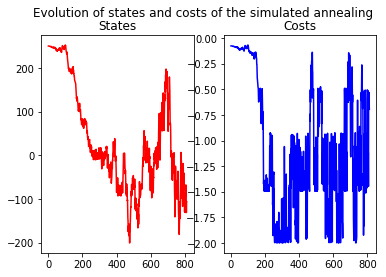

In [328]:
see_annealing(states, costs)